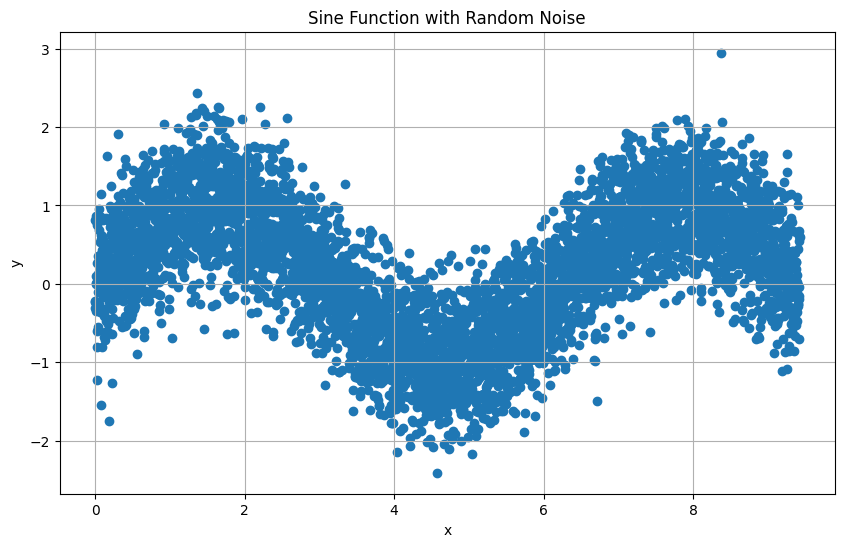

In [15]:
#dependencies 
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
import torch.optim as optim

#generating and visualizing dataset
x = np.linspace(0 * np.pi, 3 * np.pi, 5000)
y = np.sin(x) + 0.5 * np.random.randn(len(x))

plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.title("Sine Function with Random Noise")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [16]:
#transforming the input and output arrays to tensors
x_tensor = torch.from_numpy(x).float().view(-1, 1)
y_tensor = torch.from_numpy(y).float().view(-1, 1)
x_tensor.shape, y_tensor.shape

(torch.Size([5000, 1]), torch.Size([5000, 1]))

Epoch [100/1000], Loss: 0.3359
Epoch [200/1000], Loss: 0.3146
Epoch [300/1000], Loss: 0.2823
Epoch [400/1000], Loss: 0.2545
Epoch [500/1000], Loss: 0.2504
Epoch [600/1000], Loss: 0.2493
Epoch [700/1000], Loss: 0.2486
Epoch [800/1000], Loss: 0.2486
Epoch [900/1000], Loss: 0.2501
Epoch [1000/1000], Loss: 0.2486


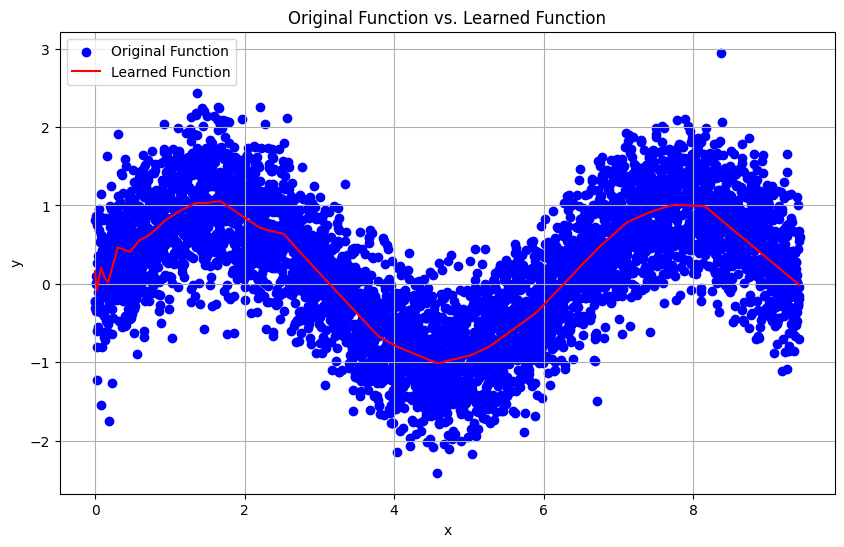

In [17]:

#implementing the model
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.hidden = nn.Linear(1, 128)
    self.hidden2 = nn.Linear(128, 256)
    self.hidden3 = nn.Linear(256, 128)
    self.output = nn.Linear(128, 1)
  
  def forward(self, x):
    x = torch.relu(self.hidden(x))
    x = torch.relu(self.hidden2(x))
    x = torch.relu(self.hidden3(x))
    x = self.output(x)
    return x

#instantiating the model, criterion (loss function), and optimizer
model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

#training loop
num_epochs = 1000
for epoch in range(num_epochs):
  #forward pass
  outputs = model(x_tensor)
  loss = criterion(outputs, y_tensor)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch + 1) % 100 == 0:
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

#inference and visualization

# Test the trained model
with torch.no_grad():
    predicted = model(x_tensor)

# Plot the original function and the learned function
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Original Function')
plt.plot(x, predicted.numpy(), color='red', label='Learned Function')
plt.title("Original Function vs. Learned Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()